In [1]:
import copy
 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


rand_seed = 921220

In [2]:
#load the calculated theoretical data from the csv file into a pandas dataframe
Theoretical_data = pd.read_csv('Theory_data.csv')

#load the target values of the parameters into a pandas dataframe
Target_Values = pd.read_csv('Target_Data.csv')

#look at the first few rows of the data
display(Theoretical_data.head())

#look at the Given Values
display(Target_Values.head())


,Radius (m),Aspect Ratio,Pressure Drop (Pa),Pressure Gradient(Pa m^-1),Apparent Wall Shear Rate (s^-1),Volumetric Flow Rate (m^3 s^-1)
0,0.00025,10.0,75000000.0,1.500000e+10,1.815769,2.228284e-11
1,0.00025,10.0,75000000.0,1.500000e+10,1.754430,2.153009e-11
2,0.00025,10.0,75000000.0,1.500000e+10,1.711131,2.099874e-11
3,0.00025,10.0,75000000.0,1.500000e+10,1.678935,2.060363e-11
4,0.00025,10.0,75000000.0,1.500000e+10,7.919400,9.718566e-11


,Slip Velocity Coefficient,Shear Thinning Index,Shear Thinning Consistency (Pa s^n),Volumetric Flow from Slip (m^3 s^-1),Volumetric Flow from Bulk Flow (m^3 s^-1)
0,5.000000e-11,0.5,800.000000,1.791690e-11,4.365947e-12
1,5.000000e-11,0.5,966.666667,1.791690e-11,3.613197e-12
2,5.000000e-11,0.5,1133.333333,1.791690e-11,3.081845e-12
3,5.000000e-11,0.5,1300.000000,1.791690e-11,2.686736e-12
4,5.000000e-11,0.6,800.000000,1.791690e-11,7.926876e-11


In [3]:
# Create a StandardScaler object
Xscaler = StandardScaler()
yscaler = StandardScaler()

#scale the data
Theoretical_data_scaled = Xscaler.fit_transform(Theoretical_data)
Target_Values_scaled = yscaler.fit_transform(Target_Values)

#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(Theoretical_data_scaled, Target_Values_scaled, test_size=0.5, random_state=rand_seed)

#split the training data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=rand_seed)


In [4]:
print(X_train.shape, "train samples", X_val.shape, "validation samples", X_test.shape, "test samples")
print(y_train.shape, "train samples", y_val.shape, "validation samples", y_test.shape, "test samples")  

(18000, 6) train samples (18000, 6) validation samples (36000, 6) test samples
(18000, 5) train samples (18000, 5) validation samples (36000, 5) test samples


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model architecture
model = keras.Sequential([
    layers.Dense(64, activation='gelu', input_shape=(6,)), # Input layer
    layers.Dense(64, activation='gelu'), # Hidden layer1
    layers.Dense(64, activation='gelu'), # Hidden layer2
    layers.Dense(5) # No activation function for the output layer (linear activation function
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/100
563/563 [==============================] - 4s 6ms/step - loss: 0.5322 - val_loss: 0.4712
Epoch 2/100
563/563 [==============================] - 3s 5ms/step - loss: 0.4647 - val_loss: 0.4556
Epoch 3/100
563/563 [==============================] - 3s 5ms/step - loss: 0.4486 - val_loss: 0.4413
Epoch 4/100
563/563 [==============================] - 3s 5ms/step - loss: 0.4367 - val_loss: 0.4305
Epoch 5/100
563/563 [==============================] - 3s 5ms/step - loss: 0.4263 - val_loss: 0.4222
Epoch 6/100
563/563 [==============================] - 3s 5ms/step - loss: 0.4136 - val_loss: 0.4078
Epoch 7/100
563/563 [==============================] - 3s 5ms/step - loss: 0.4039 - val_loss: 0.4003
Epoch 8/100
563/563 [==============================] - 3s 5ms/step - loss: 0.3975 - val_loss: 0.3943
Epoch 9/100
563/563 [==============================] - 3s 6ms/step - loss: 0.3931 - val_loss: 0.3951
Epoch 10/100
563/563 [==============================] - 3s 5ms/step - loss: 0.3897 - val_lo

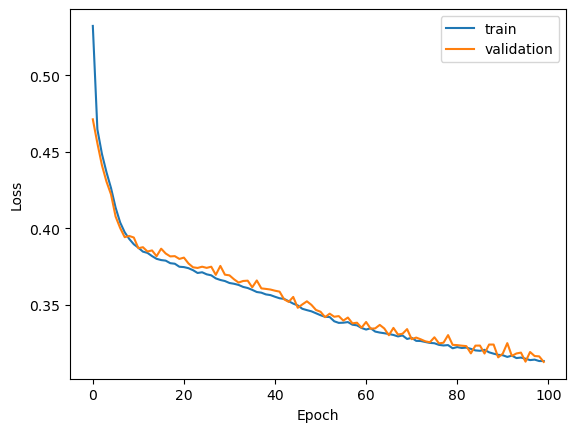

In [6]:
# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
#turn the scaled data back into the original data
X_test_df = Xscaler.inverse_transform(X_test)
y_test_df = yscaler.inverse_transform(y_test)
y_pred_df = yscaler.inverse_transform(y_pred)

print(X_test_df[:,4].size)
print(y_test_df[:,4].size)

36000
36000


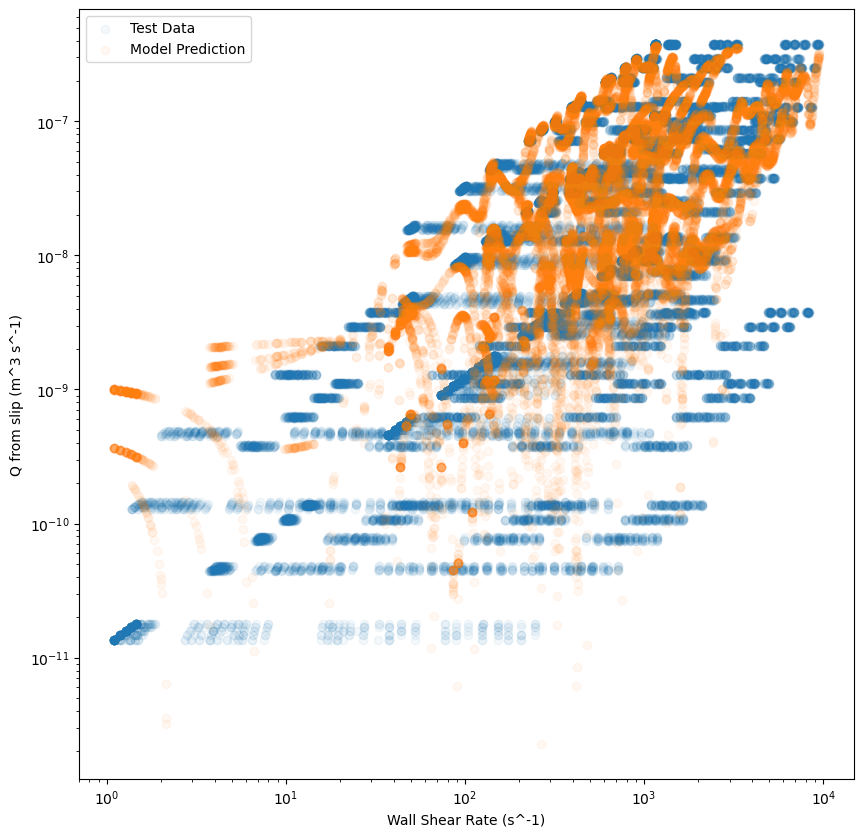

In [14]:
#plot the data
plt.figure(figsize=(10, 10))
plt.scatter(X_test_df[:,4], y_test_df[:,3], label = 'Test Data', alpha = 0.05)
plt.scatter(X_test_df[:,4], y_pred_df[:,3], label = 'Model Prediction', alpha = 0.05)
plt.xlabel('Wall Shear Rate (s^-1)')
plt.ylabel('Q from slip (m^3 s^-1)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()



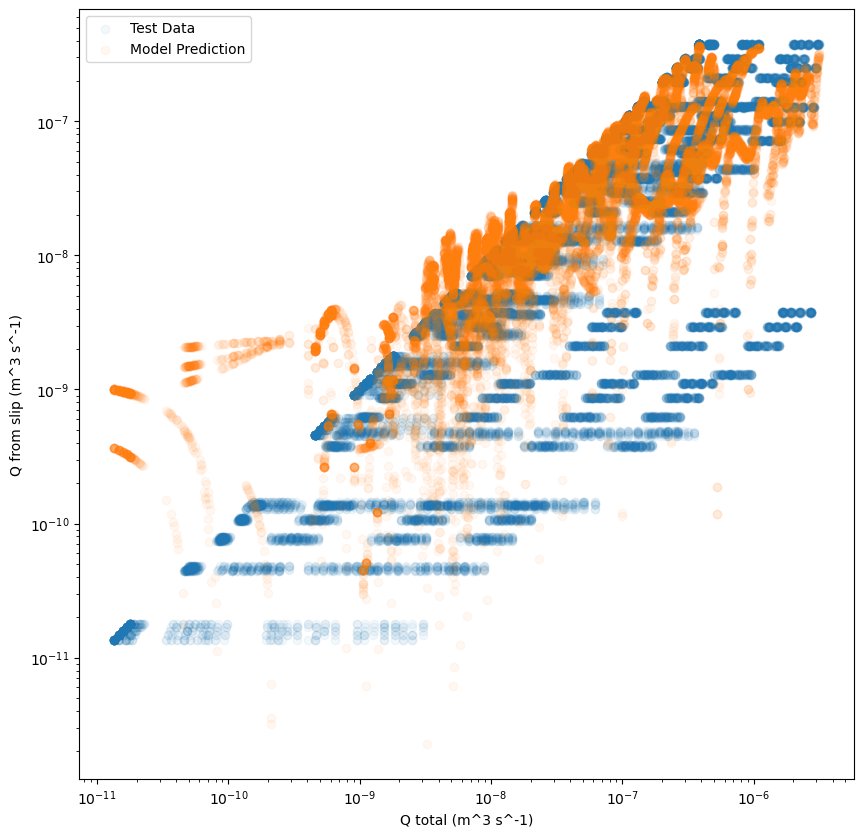

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(X_test_df[:,5], y_test_df[:,3], label = 'Test Data', alpha = 0.05)
plt.scatter(X_test_df[:,5], y_pred_df[:,3], label = 'Model Prediction', alpha = 0.05)
plt.xlabel('Q total (m^3 s^-1)')
plt.ylabel('Q from slip (m^3 s^-1)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

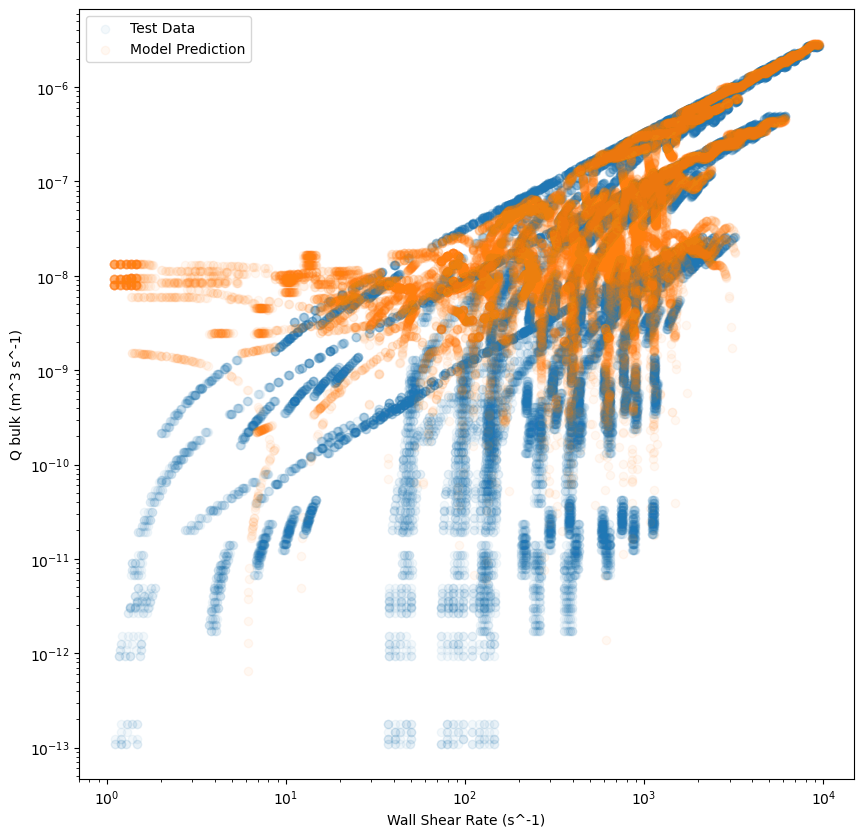

In [9]:
#plot the data
plt.figure(figsize=(10, 10))
plt.scatter(X_test_df[:,4], y_test_df[:,4], label = 'Test Data', alpha = 0.05)
plt.scatter(X_test_df[:,4], y_pred_df[:,4], label = 'Model Prediction', alpha = 0.05)
plt.xlabel('Wall Shear Rate (s^-1)')
plt.ylabel('Q bulk (m^3 s^-1)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

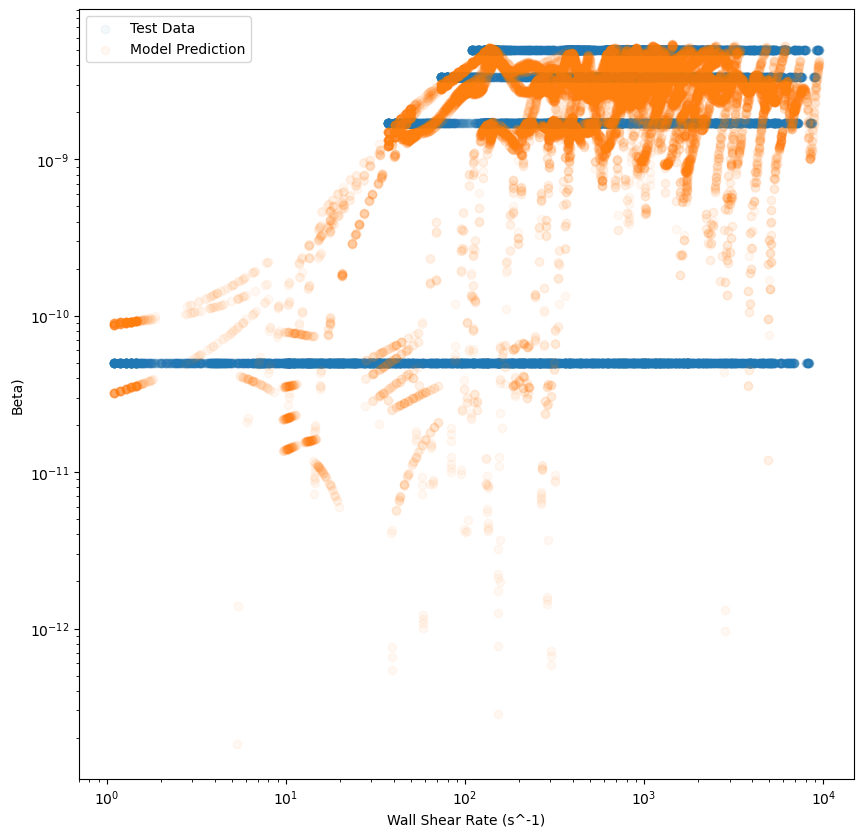

In [10]:
#plot the data
plt.figure(figsize=(10, 10))
plt.scatter(X_test_df[:,4], y_test_df[:,0], label = 'Test Data', alpha = 0.05)
plt.scatter(X_test_df[:,4], y_pred_df[:,0], label = 'Model Prediction', alpha = 0.05)
plt.xlabel('Wall Shear Rate (s^-1)')
plt.ylabel('Beta)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

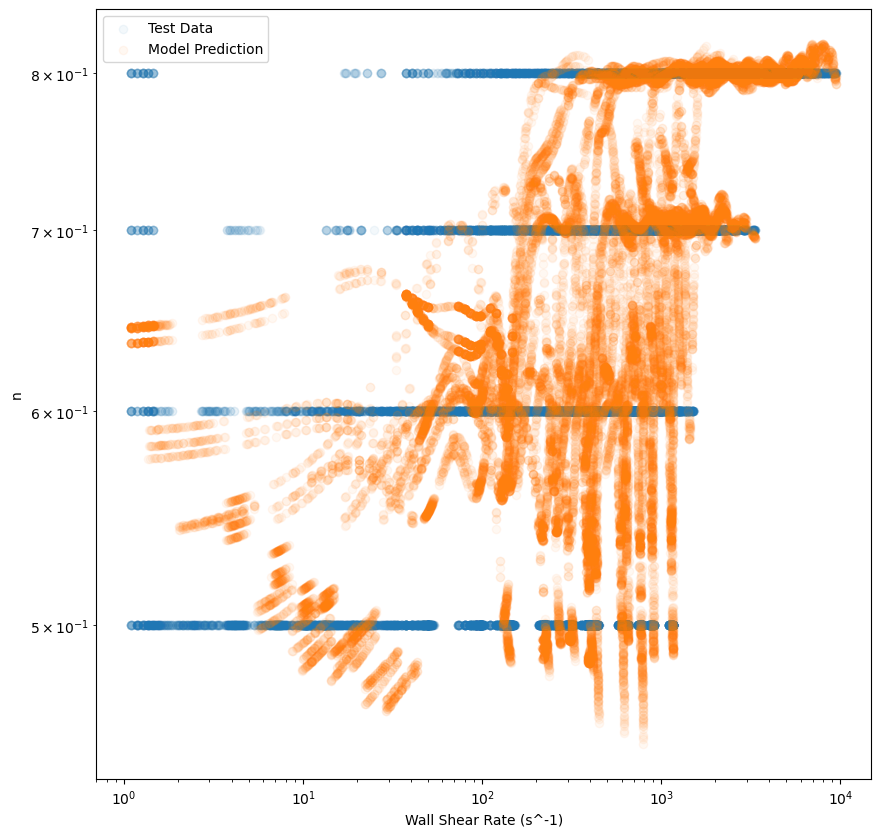

In [11]:
#plot the data
plt.figure(figsize=(10, 10))
plt.scatter(X_test_df[:,4], y_test_df[:,1], label = 'Test Data', alpha = 0.05)
plt.scatter(X_test_df[:,4], y_pred_df[:,1], label = 'Model Prediction', alpha = 0.05)
plt.xlabel('Wall Shear Rate (s^-1)')
plt.ylabel('n')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

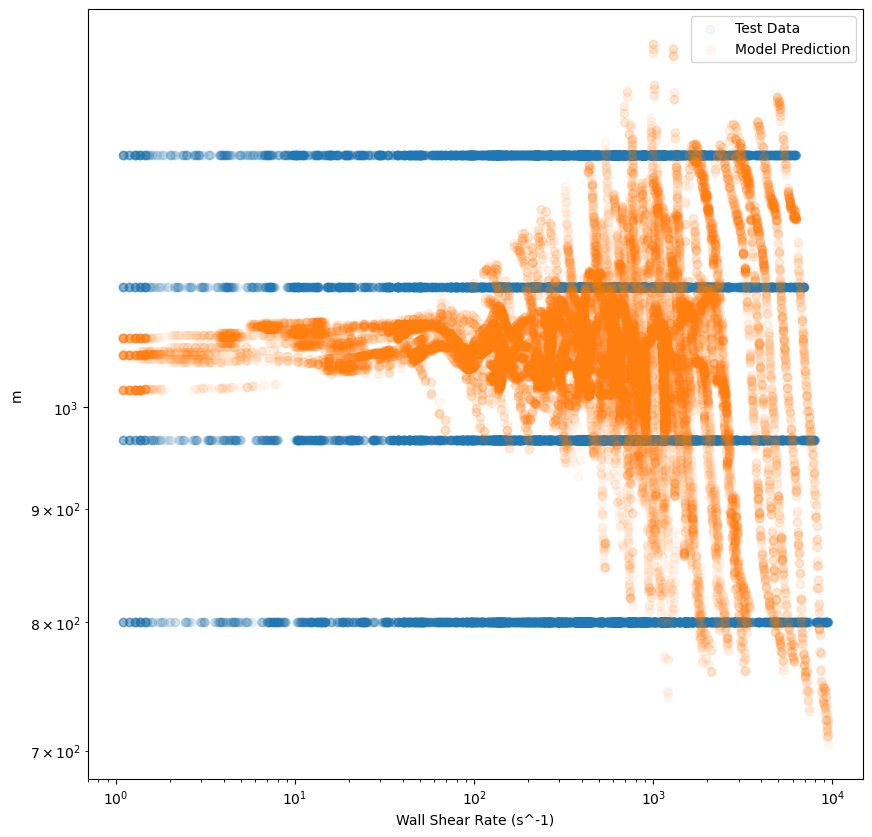

In [12]:
#plot the data
plt.figure(figsize=(10, 10))
plt.scatter(X_test_df[:,4], y_test_df[:,2], label = 'Test Data', alpha = 0.05)
plt.scatter(X_test_df[:,4], y_pred_df[:,2], label = 'Model Prediction', alpha = 0.05)
plt.xlabel('Wall Shear Rate (s^-1)')
plt.ylabel('m')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()